In [160]:
import pandas as pd
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

from sklearn.preprocessing import scale
import matplotlib.pyplot as plt


In [346]:
all_columns = ['class'] + range(13)

data = pd.read_csv('wine.data', names = all_columns)

data.columns = all_columns

X = data[all_columns[1:]]
y = data[all_columns[0]]

X = scale(X) #with preprocessing 


In [347]:
kf = KFold(len(y), n_folds=5, shuffle=True, random_state=42)
yAxis = range(1,50)
result = np.array([])
for i in yAxis:
    knn = KNeighborsClassifier(n_neighbors=i)
    score = np.mean(cross_val_score(knn,X,y ,cv=kf,scoring='accuracy'))
    result =np.append(result, score)

In [355]:
best_accuracy = np.max(result)
best_k = ((np.where(result == result.max()))[0] + 1)[0]
print 'k = ', best_k, 'accuracy = ', np.max(result)
with open('task_1_acuracy.txt', 'w') as out:
    out.write('%.2f' % best_accuracy)
    
with open('task_1_best_k.txt', 'w') as out:
    out.write('%.2f' % best_k)

k =  29 accuracy =  0.977619047619


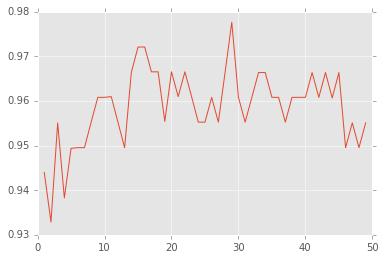

In [349]:
plt.plot(yAxis, result)
plt.show()